In [39]:
#Importing important packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras # Neural Networks
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Z-scaling -- (column - columnmean)/standard deviation
from sklearn.metrics import roc_auc_score
import os 
from sklearn.preprocessing import LabelEncoder

In [40]:
data = pd.read_csv("BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [41]:
data.isnull().sum() # checking the missing value 

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [42]:
data.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [43]:
#dependant variable is extracted 
target=data['class']
#independant variable is extracted 
data=data.drop(['class'],axis=1)
data.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [44]:

# ensure all data are floating point values
data =data.astype('float32')
# encode strings to integer
target = LabelEncoder().fit_transform(target)


In [45]:
#divide dataset into training set and test set
# and standardising dataset
# 70% train, ,30% Test
trainX, testX, trainY, testY = train_test_split(data, target, train_size=0.7, stratify=target, random_state=2)
print(trainY.shape)
print(np.sum(trainY))
print(testY.shape)
print(np.sum(testY))

(960,)
427
(412,)
183


In [46]:
scaler=StandardScaler().fit(trainX) # computes mean and stddev of each column of the train split
trainX_scaled=scaler.transform(trainX) # operation - (column - its mean)/its stddev
testX_scaled=scaler.transform(testX)

In [47]:
model=Sequential() # Name suggests that the layers of the Neural Network will be in sequence
# Dense is just a name for a simple neural network layer

#1st hidden layer
model.add(Dense(15, input_dim=4, kernel_initializer='normal', activation='relu'))
              # 15 neurons, the first layer of a neural network must contain the input_dim which is the number of input data-columns
              # Initially weights of the neural network are random values drawn from a standard gaussian/normal distribution between -1 to 1


#Ouput layer(only 1 neuron because it is a binary classification problem, so we require only 1 output)
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                75        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Name of logistic loss in keras is binary_crossentropy
# adam - adaptive learning rate, thatswhy no need to provide learning rate

In [50]:
# saving the model on every epoch 
if not os.path.exists('/content/saved_models'):
    os.mkdir('/content/saved_models')

filepath = '/content/saved_models/model-{epoch:05d}.h5'
num_epochs = 250
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history = model.fit(x=trainX_scaled, y=trainY, batch_size=50, epochs=num_epochs, verbose=1, callbacks=callbacks_list,
                    validation_data=(testX_scaled, testY))

Epoch 1/250
20/20 [==============================] - 1s 15ms/step - loss: 0.6908 - accuracy: 0.6815 - val_loss: 0.6846 - val_accuracy: 0.8374

Epoch 00001: val_loss improved from inf to 0.68464, saving model to /content/saved_models/model-00001.h5
Epoch 2/250
20/20 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.8408 - val_loss: 0.6711 - val_accuracy: 0.8301

Epoch 00002: val_loss improved from 0.68464 to 0.67114, saving model to /content/saved_models/model-00002.h5
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.8244 - val_loss: 0.6492 - val_accuracy: 0.8398

Epoch 00003: val_loss improved from 0.67114 to 0.64921, saving model to /content/saved_models/model-00003.h5
Epoch 4/250
20/20 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.8507 - val_loss: 0.6174 - val_accuracy: 0.8495

Epoch 00004: val_loss improved from 0.64921 to 0.61744, saving model to /content/saved_models/model-00004.h5

In [51]:
history.history # Python Dictionary with 4 keys accuracy, loss (training), val_loss, val_accuracy

{'accuracy': [0.7437499761581421,
  0.8302083611488342,
  0.8333333134651184,
  0.8489583134651184,
  0.8635416626930237,
  0.878125011920929,
  0.8885416388511658,
  0.9041666388511658,
  0.921875,
  0.9416666626930237,
  0.9520833492279053,
  0.9583333134651184,
  0.9624999761581421,
  0.965624988079071,
  0.9677083492279053,
  0.9708333611488342,
  0.9729166626930237,
  0.9739583134651184,
  0.9750000238418579,
  0.9770833253860474,
  0.9770833253860474,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9781249761581421,
  0.9802083373069763,
  0.9802083373069763,
  0.9791666865348816,
  0.9791666865348816,
  0.9791666865348816,
  0.9781249761581421,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.9802083373069763,
  0.980208

In [52]:
# training loss versus validation loss plot 

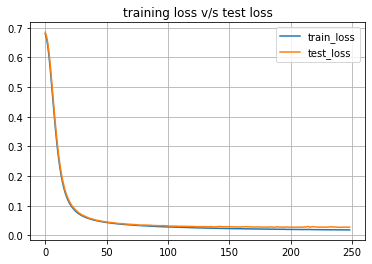

In [64]:
#Python Dictionary with 4 keys accuracy, loss (training), val_loss, val_accuracy
plt.plot(range(num_epochs-1), history.history['loss'][1:], label='train_loss')
plt.plot(range(num_epochs-1), history.history['val_loss'][:-1], label='test_loss')
plt.legend()
plt.grid()
plt.title('training loss v/s test loss')
plt.show()


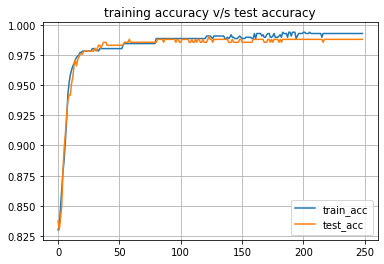

In [63]:
plt.plot(range(num_epochs-1), history.history['accuracy'][1:], label='train_acc')
plt.plot(range(num_epochs-1), history.history['val_accuracy'][:-1], label='test_acc')
plt.legend()
plt.grid()
plt.title('training accuracy v/s test accuracy')
plt.show()


In [55]:
print('Minimum Validation Loss:', np.min(history.history['val_loss']))
print('Best epoch corresponding to Minimum Validation Loss:', np.argmin(history.history['val_loss'])+1)

Minimum Validation Loss: 0.026662785559892654
Best epoch corresponding to Minimum Validation Loss: 196


In [56]:
model_best = load_model('/content/saved_models/model-00222.h5')

In [57]:
print('AUC on test =', roc_auc_score(y_true=testY, y_score=model_best.predict_proba(testX_scaled)))

AUC on test = 0.9997375140191377


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [58]:
print('AUC on train =', roc_auc_score(y_true=trainY, y_score=model_best.predict_proba(trainX_scaled)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC on train = 0.9999209107565764


In [59]:
y_pred= model_best.predict_classes(testX_scaled)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
from sklearn.metrics import f1_score

In [61]:
# ('F1 score')=# f1: 2 tp / (2 tp + fp + fn)
## F-score or F-measure is a measure of a test's accuracy.
f1 = f1_score(testY, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.986226
